# Aprendizaje Automático
# Tarea 2 - Modelado

Profesor: Felipe Meza

Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Estudiantes:

1. Sophia Contreras
2. Yoksan Varela
3. Mauro Víquez

Lista de las librerias por ser usadas:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from random import randrange
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use('ggplot')

## Problema por resolver
Modelar la calidad del vino de tinto del norte de Portugal, solamente basandose en resultados de las pruebas fisico quimicas de los mismos. El dataset original se encuentra en el siguiente enlance: https://archive.ics.uci.edu/dataset/186/wine+quality

### Primera Parte: Analisis exploratorio y pre-procesado de set de datos

Inicialmente, se importa el set de datos con las informacion de los vinos tintos del estudio (el .csv en uso se va a importar desde una copia local en GitHub)

In [2]:
redWine_dataset = pd.read_csv("https://raw.githubusercontent.com/YoksanVC/TEC_DataScienceCert/main/Module_2_AprendizajeAutomatico/Tarea2/Datasets/winequality-red.csv", header=0, delimiter=';')
redWine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Analizando la forma del set de datos con el que vamos a trabajar:

In [3]:
redWine_dataset.shape

(1599, 12)

Se cuenta con 1599 instancias y 12 atributos. Verificando que no hayan valores nulos en el set de datos antes de continuar con el analisis exploratorio:

In [4]:
redWine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Se confirma que no tenemos valores Nulos que tengamos que trabajar. Ahora, verifiquemos que todas la instancias en un formato numerico intepretable por los modelos.

In [5]:
for instancia in redWine_dataset:
    print(f"El tipo del atributo {instancia} es {redWine_dataset[instancia].dtype}")

El tipo del atributo fixed acidity es float64
El tipo del atributo volatile acidity es float64
El tipo del atributo citric acid es float64
El tipo del atributo residual sugar es float64
El tipo del atributo chlorides es float64
El tipo del atributo free sulfur dioxide es float64
El tipo del atributo total sulfur dioxide es float64
El tipo del atributo density es float64
El tipo del atributo pH es float64
El tipo del atributo sulphates es float64
El tipo del atributo alcohol es float64
El tipo del atributo quality es int64


Todas la instancias son de tipo flotante o integer, por lo que no es necesario hacer un remapeo y no habra problema con los algoritmos. Como lo que interesa es modelar la calidad de los vinos, nuestras clases va a ser la columna "quality". Veamos su distribucion:

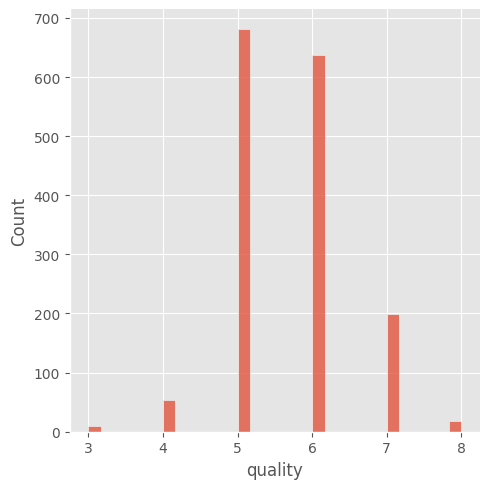

In [6]:
sns.displot(redWine_dataset, x="quality")

Con esta distribucion se nota un problema: hay un desbalance entre la calidad de los vinos, ya que se tienen muchos datos de calidad entre 5 y 6 pero pocos de los demas. Se procede a balancear los datos para tener una distribucion mas balanceada entre la calidad; pero antes de empezar con esta parte, se procede a Normalizar (dado que hay una variacion considerable entre los atributos) y Estandarizar (para centrarlos) los datos.

In [7]:
# Guarda la última columna
last_column = redWine_dataset.iloc[:, -1]

# Elimina la última columna antes de la normalización y estandarización
redWine_dataset = redWine_dataset.iloc[:, :-1]

# Normalización, limitando a 6 decimales
for instancia in redWine_dataset:
    minValue = redWine_dataset[instancia].min()
    maxValue = redWine_dataset[instancia].max()
    redWine_dataset[instancia] = (((redWine_dataset[instancia] - minValue) / (maxValue - minValue))).round(6)

# Estandarización, limitando a 6 decimales
for instancia in redWine_dataset:
    mean = np.mean(redWine_dataset[instancia])
    std = np.std(redWine_dataset[instancia])
    redWine_dataset[instancia] = ((redWine_dataset[instancia] - mean) / (std)).round(6)

# Vuelve a agregar la última columna
redWine_dataset = pd.concat([redWine_dataset, last_column], axis=1)

redWine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528357,0.961875,-1.391472,-0.453220,-0.243703,-0.466194,-0.379132,0.558277,1.288642,-0.579203,-0.960247,5
1,-0.298546,1.967443,-1.391472,0.043413,0.223880,0.872636,0.624366,0.028259,-0.719932,0.128951,-0.584775,5
2,-0.298546,1.297064,-1.186070,-0.169431,0.096354,-0.083671,0.229044,0.134267,-0.331176,-0.048087,-0.584775,5
3,1.654857,-1.384444,1.484154,-0.453220,-0.264964,0.107590,0.411503,0.664277,-0.979103,-0.461177,-0.584775,6
4,-0.528357,0.961875,-1.391472,-0.453220,-0.243703,-0.466194,-0.379132,0.558277,1.288642,-0.579203,-0.960247,5


Veamos cual es la cuenta exacta por valor en la columna de calidad:

In [8]:
print(redWine_dataset['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


Hay 3 calidades que tienen muchos datos: 5, 6 y 7. Se procede a crear una funcion que recibe como parametros: un dataframe (obligatorio), el valor con el que se desea hacer el filtro (obligatorio) y la cantidad total de isntancias deseadas con el fin de realizar un sub-muestreo de esos valores (opcional con un valor por defecto de 100).

In [9]:
def subsampling(dataframe_ori, filter, sampling_limit=100):
    dataframe = dataframe_ori.copy()
    limit_counter = 0
    for i in range(dataframe.shape[0]):
        if (dataframe['quality'][i] == filter):
            if (limit_counter < sampling_limit):
                randNumber = randrange(1,10)
                if (dataframe.loc[i,'quality'] == filter and randNumber <= 4): # Probabilidad de un 40% de mantenerse
                    limit_counter += 1
                else:
                    dataframe.loc[i,'quality'] = pd.NA
            else:
                dataframe.loc[i,'quality'] = pd.NA
    return dataframe


Creando una copia del set datos para conservar los datos originales:

In [10]:
redWine_dataset_trimmed = redWine_dataset.copy()
redWine_dataset_trimmed.shape

(1599, 12)

Se realiza el sub-muestreo con la funcion subsampling y verificamos la cantidad de datos final:

In [11]:
# Sub-muestreo usando la fincion de subsampling
redWine_dataset_trimmed = subsampling(redWine_dataset_trimmed,5,100)
redWine_dataset_trimmed = subsampling(redWine_dataset_trimmed,6,100)
redWine_dataset_trimmed = subsampling(redWine_dataset_trimmed,7,80)

# Removiendo todos los NaN
redWine_dataset_trimmed.dropna(inplace=True)

redWine_dataset_trimmed.shape

(361, 12)

Ahora, hacemos histograma para confirmar que se alcanzado un mejor balance; aunque cabe la pena rescatar que pasamos de mas de 1000 instancias a 368, lo cual podria provocar un problema de under-fitting.

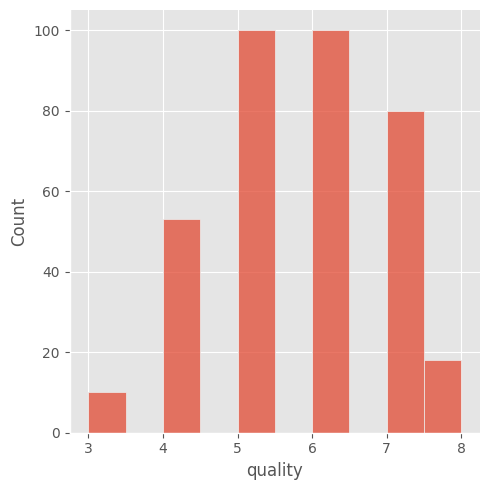

In [12]:
sns.displot(redWine_dataset_trimmed, x="quality")

Se confirma que se tiene un mejor balance. Ya con esto completo, vamos a hacer una revision de los atributos. Hay 12 atributos por analizar, por lo que deberiamos hacer un descarte de algunos para simplificar el modelo. Vamos a crear 3 nuevos data sets, con 4 atributos cada uno, para luego analizar las densidades de cada grupo (lo hacemos con densidades para no hacer una comparacion de datos directa dado que las cantidades son distintas):

In [13]:
df_grupo1 = redWine_dataset_trimmed[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']]
df_grupo2 = redWine_dataset_trimmed[['chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density']]
df_grupo3 = redWine_dataset_trimmed[['pH', 'sulphates','alcohol']]

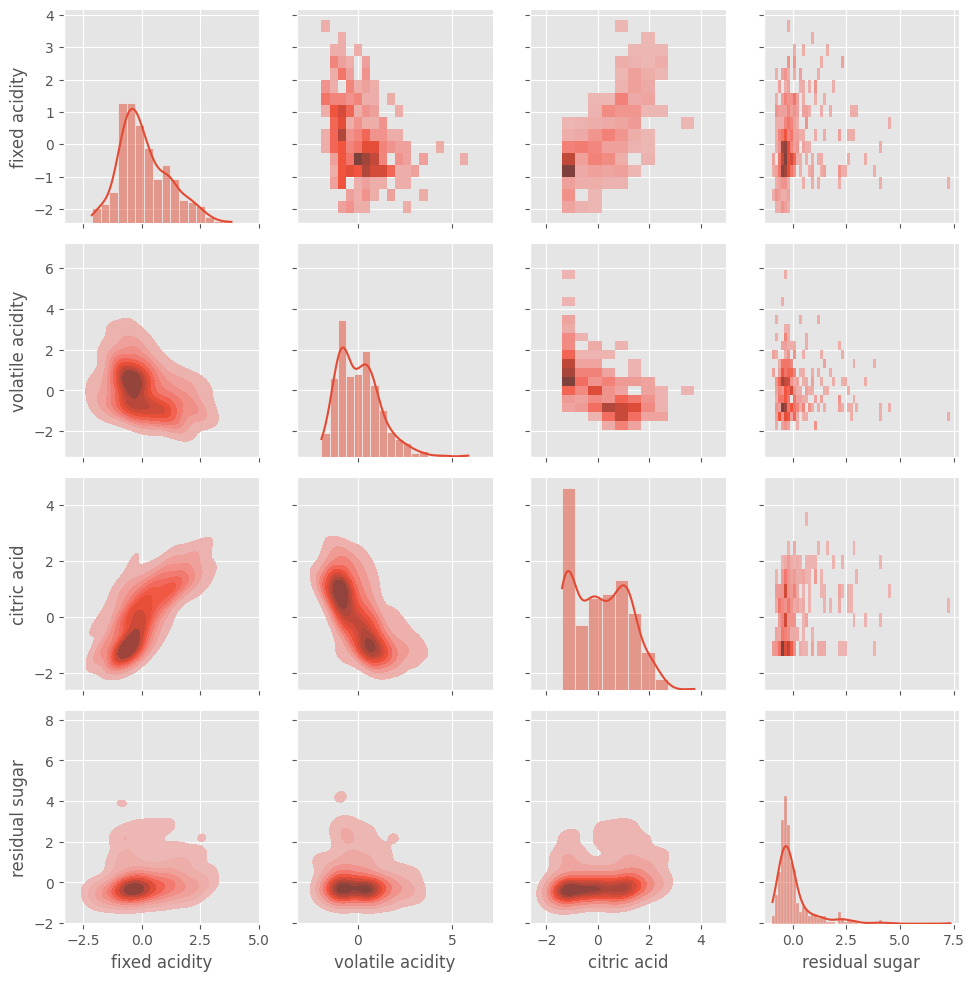

In [14]:
g = sns.PairGrid(df_grupo1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

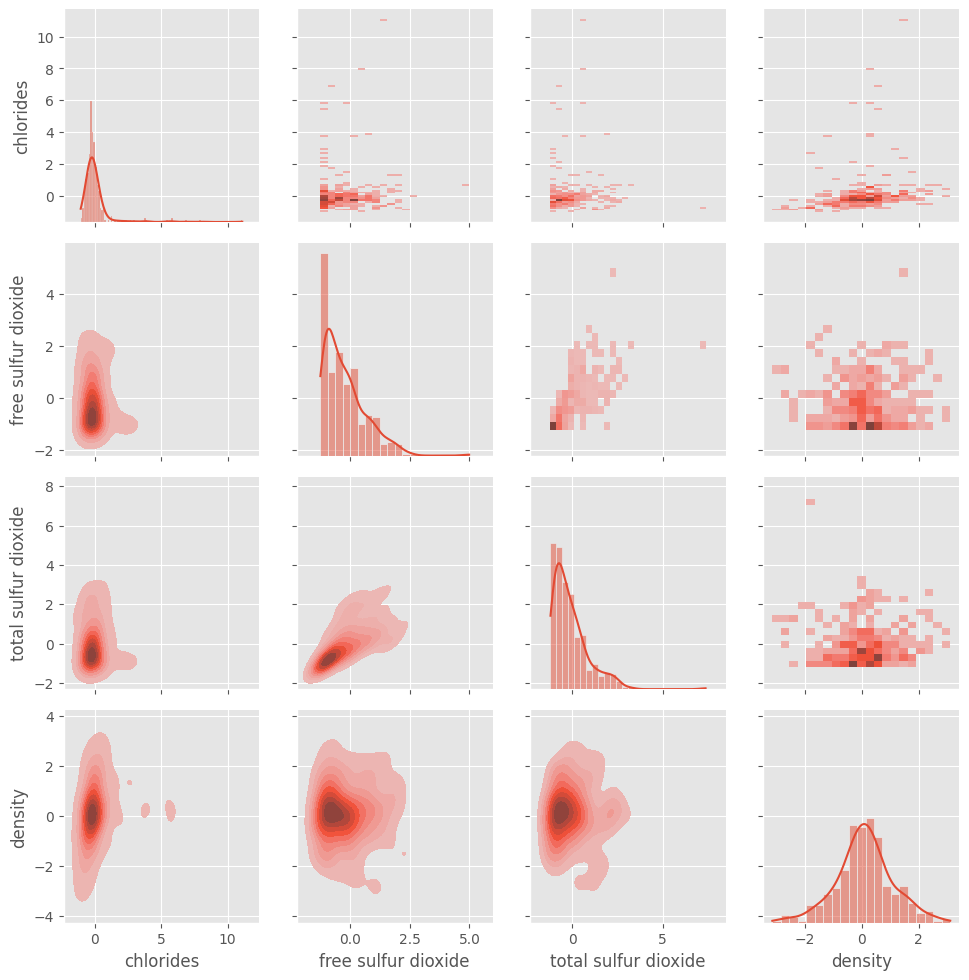

In [15]:
g = sns.PairGrid(df_grupo2)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

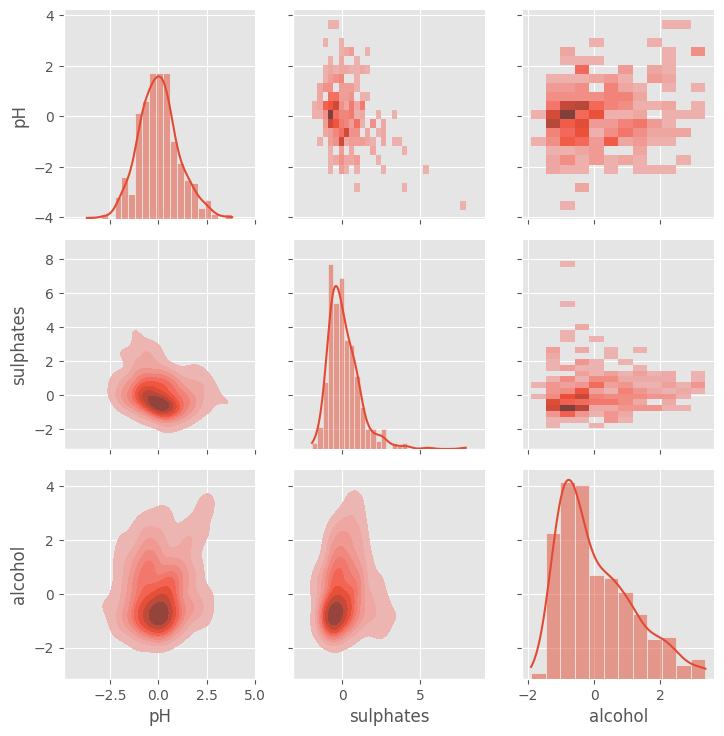

In [16]:
g = sns.PairGrid(df_grupo3)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Despues de analizar cada grupo, podemos llegar a las siguientes conclusiones:
- El set de datos fue sometido a un sub-muestredo de la calidad, la cual sigue una distribucion normal. Algunos de los atributos no siguen una distribucion normal, tienen skewness muy pronunciados hacia la derecha, lo cual sugiere que esos atributos no podrian ser afectar mucho la calidad del vino.
- Otros atributos si muestran una distribucion bastante normal, lo que los convierte en candidatos para poder usados en el modelo de regresion.

Por lo tanto, los atributos seleccionados para crear el modelo son: *fixed acidity, volatile acidity, density, pH y alcohol*

### Segunda Parte: Modelado y medicion de rendimiento del modelo

Lo primero es crear el set de datos con los atributos seleccionados:

In [17]:
redWine_dataset_toModel = redWine_dataset_trimmed[['fixed acidity', 'volatile acidity','density','pH','alcohol','quality']]
redWine_dataset_toModel.shape

(361, 6)

In [18]:
redWine_dataset_toModel.head(10)

,fixed acidity,volatile acidity,density,pH,alcohol,quality
1,-0.298546,1.967443,0.028259,-0.719932,-0.584775,5.0
2,-0.298546,1.297064,0.134267,-0.331176,-0.584775,5.0
4,-0.528357,0.961875,0.558277,1.288642,-0.960247,5.0
6,-0.241097,0.403228,-0.183743,-0.072005,-0.960247,5.0
7,-0.585813,0.682555,-1.137770,0.511129,-0.397042,7.0
8,-0.298546,0.291495,0.028259,0.316751,-0.866378,7.0
10,-0.930529,0.291495,-0.448751,-0.201591,-1.147981,5.0
11,-0.470907,-0.155418,0.558277,0.251958,0.072294,5.0
12,-1.562511,0.487025,-1.296771,1.742191,-0.490911,5.0
18,-0.528357,0.347366,0.346268,0.446337,-1.335714,4.0


Separemos los atributos y la clase:

In [19]:
atributos = redWine_dataset_toModel[['fixed acidity', 'volatile acidity','density','pH','alcohol']]
clase = redWine_dataset_toModel['quality']

In [20]:
atributos.head()

,fixed acidity,volatile acidity,density,pH,alcohol
1,-0.298546,1.967443,0.028259,-0.719932,-0.584775
2,-0.298546,1.297064,0.134267,-0.331176,-0.584775
4,-0.528357,0.961875,0.558277,1.288642,-0.960247
6,-0.241097,0.403228,-0.183743,-0.072005,-0.960247
7,-0.585813,0.682555,-1.137770,0.511129,-0.397042


In [21]:
clase.head()

1    5.0
2    5.0
4    5.0
6    5.0
7    7.0
Name: quality, dtype: float64

Ahora se separan los datos para entrenamiento y prueba. Para esto usamos la funcion split de sklearn y verificamos las dimensiones para confirmar que todo este divido correctamente:

In [22]:
from sklearn.model_selection import train_test_split
#se procede a dividir los datos en una proporción de 80/20
X_train, X_test, y_train, y_test = train_test_split(atributos,clase, test_size=0.20)
print('Size of Train Data: ' + str(len(X_train)))
print('Size of Test Data: ' + str(len(X_test)))

Size of Train Data: 288
Size of Test Data: 73


#### Primero Modelo de Regression: GaussianProcessClassifier (GPC)
El primer modelo a probar es GPC, el cual es proceso de calificacion basado en la aproximacion de Laplace. Este algoritmo tiene como hyperparametro el kernel, el cual especifica la funcion de covarianza usada por el Proceso Gausiano. El valor por defecto del Kernel es "1.0*RBF(1.0)", y los hyperparametros del kernel se van optimizando automaticamente durante el entrenamiento.

Para mas informacion detallada de este modelo visitar el siguiente enlace: 

In [23]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Definiendo el Kernel
kernel = 1.0 * RBF(1.0)

# Usando los valores por defecto
gpc_Model_1 = GaussianProcessClassifier(kernel=kernel,random_state=0)
gpc_Model_1.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)

Ya con el modelo GCP creado y entrenado, se procede a calcular el Accuracy para determinar el rendimiento del mismo:

In [24]:
from sklearn.metrics import accuracy_score

y_prediction = gpc_Model_1.predict(X_test)
gpc_Score = round(accuracy_score(y_test,y_prediction)*100,2)
print(f"Certeza del GPC: {gpc_Score}%")


Certeza del GPC: 54.79%


Se grafican los valores de la prediccion contra los valores del test para tener una referencua visual del rendimiento del modelo:

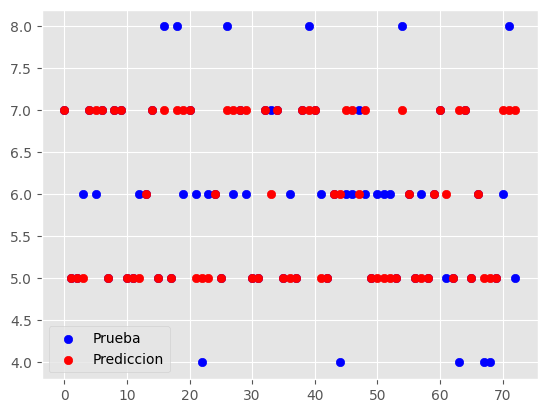

In [30]:
plt.scatter(range(len(y_test)),y_test, label = 'Prueba', color="blue")
plt.scatter(range(len(y_prediction)),y_prediction, label = 'Prediccion', color="red")
plt.legend()
plt.show()

De este modelo se concluye lo siguiente:
- Una certeza del 52.8% nos indica que este modelo NO es apto para la clase de problema de clasificacion que tenemos.
- La prediccion esta muy concentrada entre los valores de calidad 7 y 5, lo cual podria indicar que: no se cuenta con los atributos correctos para determinar si hay vinos de muy buena calidad o de muy mala calidad dado que se seleccionaron los atributos que siguen una forma normal; o bien, lo que hace que un vino sea muy bueno o muy malo podrian ser condiciones extremas (outliers) de los otros atributos.

#### Segundo: Modelo KNN
El modelo KNN funciona tomando como base los "K" vecinos más cercanos de un punto dado. Este modelo es efectivo si los datos no tiene un traslape alto o si hay regiones muy divididas y marcadas en la segmentación. Para ello comenzamos revisando la distribución de los datos gráficamente. 

In [ ]:
sns.pairplot(redWine_dataset_toModel, hue='quality', height=3.5)

En situaciones no didacticas se recomendaría no utilizar este algoritmo debido a que los puntos están cerca el úno del otro en todas las distribuciones estándar y gráficos de dispersion por lo que los "k" terminos más cercanos pueden variar mucho por punto. Sin embargo para fines del ejercicio se procede a Intentar realizar la clasificación

In [ ]:
# se importan las librerías para poder usar knn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Para obtener el valor de "k" optimo ya que es un hiperparámetro se necesita revisar el accuracy de modelo para cada valor de "k". El siguiente código saca el  valor optimo dando como salida el accuracy de los datos tanto de entrenamiento como de prueba

In [ ]:
#definimos hasta cual valor de K se quiere probar
k=50

In [ ]:
accuracy_train =[]
for num in range(1, k):
  knn = KNeighborsClassifier(n_neighbors=num)
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_train)
  acc=round((accuracy_score(y_train, prediction) * 100), 2)
  accuracy_train.append(acc)

In [ ]:
accuracy_test =[]
for num in range(1, k):
  knn = KNeighborsClassifier(n_neighbors=num)
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)
  acc=round((accuracy_score(y_test, prediction) * 100), 2)
  accuracy_test.append(acc)

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, k), accuracy_train, color='blue', marker='o', label='Train Accuracy')
plt.plot(range(1, k), accuracy_test, color='red', marker='s', label='Test Accuracy')
plt.ylabel("Accuracy (%)")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

Se calcula un valor de "K" para este ejercicio que sea el que tiene la mejor proporción de cercanía entre curvas con el mejor Accuracy posible para los datos de prueba.

In [ ]:
# Convertir a numpy
np_accuracy_test = np.array(accuracy_test)
np_accuracy_train= np.array(accuracy_train)


data = {'accuracy_test': accuracy_test}
df = pd.DataFrame(data)

#Se busca el los datos que estén más cerca
df['resultado_resta'] = np.abs(np_accuracy_train - np_accuracy_test)

# Se tienen dos parámetros: 1-Accuracy alto, 2-Poca separación entre test y train
#Para ello se crea una columna llamada score que divide accuracy (directamente proporcional) entre separación (inversamente proporcional)
#El mayor valor de este score será el índice ideal para el algoritmo
df['score'] = df['accuracy_test'] / df['resultado_resta']

# Índice del valor máximo en la columna 'score'
k = df['score'].idxmax()
KNN = df.loc[k, 'accuracy_test']


print("Para el set de datos, usando un k de: ", k, " se obtiene un accuracy de: ", KNN, "%")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
from sklearn.metrics import accuracy_score
knn_accuracy = round((accuracy_score(y_test, prediction) * 100), 2)
print(str(knn_accuracy) + '%')

En la distribución de datos se podía observar que realizar la segmentación por medio de KNN sería compplicadon debido a la multiplicidad de vecinos que se encuentran en el set de datos por lo que la clasificación se vuelve difusa para el algoritmo. 

#### Tercero: Modelo Random Forest
El modelo random forest, al igual que el modelo de KNN cuanta con un hiperparámetro de cuantos random forest se utilizarn para el cálculo del modelo. Por lo que para este modelo se utiliza una metodología similar a la utilizada anteriormente. Sin embargo, en este caso no vale la pena comparar contra los datos de entrenamiento ya que por la naturaleza del algoritmo no existe posibilidad de variación en la curva. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=30


accuracy_test =[]
for num in range(1, rf):
    model = RandomForestClassifier(n_estimators=rf)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    randomForest_model_accuracy = round((accuracy_score(y_test, prediction) * 100), 2)
    accuracy_test.append(randomForest_model_accuracy)

plt.figure(figsize=(16, 8))
plt.plot(range(1, rf), accuracy_test, color='red', marker='s', label='Test Accuracy')
plt.ylabel("Accuracy (%)")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

Random_forest = max(accuracy_test)
print("Para el set de datos, usando un n_estimators de: ", rf, " se obtiene un accuracy de: ", Random_forest, "%")